In [1]:
import sqlite3 as sq
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
connection = sq.connect('chinook.db')
cursor = connection.cursor()

#coding sql here, contoh :
#crude_query = "(query languange, SELECT, JOIN, dll)"
#input_list = (data)
#cursor.execute(crude_query,input_list)

crude_query = ''' SELECT customers.FirstName, customers.LastName,
                invoices.InvoiceDate, invoices.BillingCity,invoices.BillingCountry,invoices.Total
                FROM customers
                INNER JOIN invoices
                on customers.CustomerId = invoices.CustomerId
             '''
cursor.execute(crude_query)
penjualan =  cursor.fetchall()

#connection.commit() #commit dipake buat perubahan data pada tabel (buat masukin data python ke database)
cursor.close()
connection.close()

In [3]:
data = pd.DataFrame(penjualan,columns = ['nama depan',
                                          'nama belakang',
                                          'tanggal invoice',
                                          'kota pengiriman',
                                          'negara pengiriman',
                                          'pembelian'])

In [4]:
#nambah kolom nama lengkap
data['nama lengkap'] = data['nama depan'] + ' ' + data['nama belakang']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nama depan         412 non-null    object 
 1   nama belakang      412 non-null    object 
 2   tanggal invoice    412 non-null    object 
 3   kota pengiriman    412 non-null    object 
 4   negara pengiriman  412 non-null    object 
 5   pembelian          412 non-null    float64
 6   nama lengkap       412 non-null    object 
dtypes: float64(1), object(6)
memory usage: 22.7+ KB


In [6]:
#ganti tipe data tanggal invoice ke date
data['tanggal invoice'] = pd.to_datetime(data['tanggal invoice'])
data['tahun'] = data['tanggal invoice'].apply(lambda time : time.year)
data['bulan'] = data['tanggal invoice'].apply(lambda time : time.month)
data.head()

,nama depan,nama belakang,tanggal invoice,kota pengiriman,negara pengiriman,pembelian,nama lengkap,tahun,bulan
0,Luís,Gonçalves,2010-03-11,São José dos Campos,Brazil,3.98,Luís Gonçalves,2010,3
1,Luís,Gonçalves,2010-06-13,São José dos Campos,Brazil,3.96,Luís Gonçalves,2010,6
2,Luís,Gonçalves,2010-09-15,São José dos Campos,Brazil,5.94,Luís Gonçalves,2010,9
3,Luís,Gonçalves,2011-05-06,São José dos Campos,Brazil,0.99,Luís Gonçalves,2011,5
4,Luís,Gonçalves,2012-10-27,São José dos Campos,Brazil,1.98,Luís Gonçalves,2012,10


In [7]:
data = data.loc[(data['tahun']<2010) & 
                (1 < data['bulan']) &
                (data['bulan'] < 7),
               ]

In [8]:
data.head()

,nama depan,nama belakang,tanggal invoice,kota pengiriman,negara pengiriman,pembelian,nama lengkap,tahun,bulan
8,Leonie,Köhler,2009-02-11,Stuttgart,Germany,13.86,Leonie Köhler,2009,2
22,Bjørn,Hansen,2009-04-06,Oslo,Norway,5.94,Bjørn Hansen,2009,4
63,Eduardo,Martins,2009-04-09,São Paulo,Brazil,8.91,Eduardo Martins,2009,4
77,Roberto,Almeida,2009-05-23,Rio de Janeiro,Brazil,0.99,Roberto Almeida,2009,5
84,Fernanda,Ramos,2009-06-05,Brasília,Brazil,1.98,Fernanda Ramos,2009,6


In [9]:
#ganti nama bulan
bulan = {2 : 'Februari', 3 : 'March', 4 : 'April', 5 : 'May', 6 : 'Juni'}
data['bulan'] = data['bulan'].map(bulan)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 8 to 406
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   nama depan         35 non-null     object        
 1   nama belakang      35 non-null     object        
 2   tanggal invoice    35 non-null     datetime64[ns]
 3   kota pengiriman    35 non-null     object        
 4   negara pengiriman  35 non-null     object        
 5   pembelian          35 non-null     float64       
 6   nama lengkap       35 non-null     object        
 7   tahun              35 non-null     int64         
 8   bulan              35 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 2.7+ KB


In [11]:
cus_agg = data.groupby(by='nama lengkap',).agg('sum').reset_index()

In [12]:
cus_agg.head()

,nama lengkap,pembelian,tahun
0,Bjørn Hansen,5.94,2009
1,Dominique Lefebvre,15.84,4018
2,Eduardo Martins,8.91,2009
3,Ellie Sullivan,0.99,2009
4,Emma Jones,8.91,2009


In [13]:
cus_agg1 = data.groupby(by='kota pengiriman',).agg('sum').reset_index()
cus_agg2 = data.groupby(by='negara pengiriman',).agg('sum').reset_index()

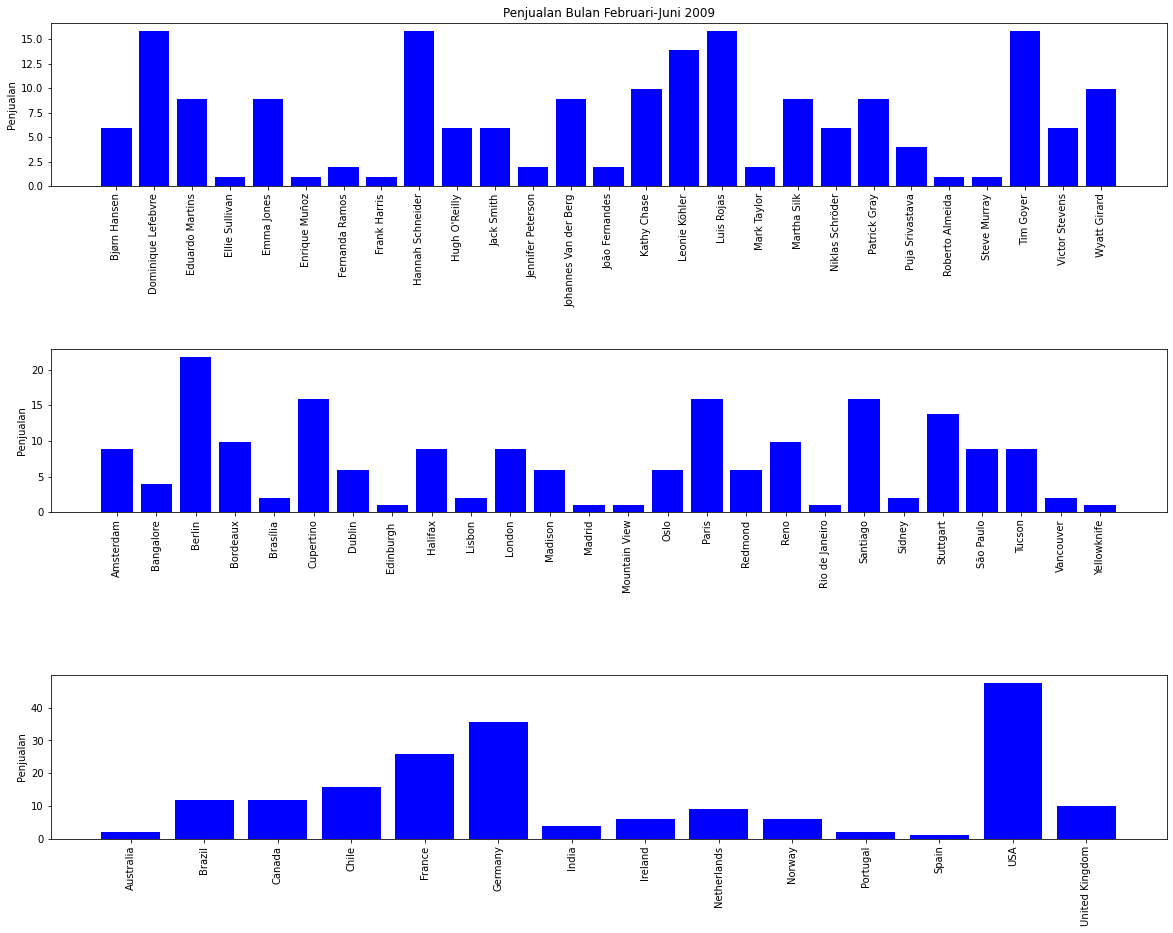

In [15]:
fig, ax = plt.subplots(nrows=3, figsize=(20,15))
x1 = cus_agg['nama lengkap']
x2 = cus_agg1['kota pengiriman']
x3 = cus_agg2['negara pengiriman']
y1 = cus_agg['pembelian']
y2 = cus_agg1['pembelian']
y3 = cus_agg2['pembelian']

ax[0].bar(x1,y1,color="blue")
ax[0].set_title('Penjualan Bulan Februari-Juni 2009')
ax[0].set_ylabel('Penjualan')
ax[0].set_xticklabels(rotation=90, labels = x1)

ax[1].bar(x2,y2,color="blue")
ax[1].set_ylabel('Penjualan')
ax[1].set_xticklabels(rotation=90, labels = x2)

ax[2].bar(x3,y3,color="blue")
ax[2].set_ylabel('Penjualan')
ax[2].set_xticklabels(rotation=90, labels = x3)

plt.subplots_adjust(hspace=1)